# SCS-3251-002: Statistics for Data Science



**Using the dataset from the video (mosquitos_data.csv in the course folder), write R or Python code:**

```
* Create side-by-side boxplots for the number of mosquitos in each group (beer vs water) 
* Answer the question: What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitos?
* Calculate basic statistics measures for each group: the mean, median, standard deviation
* Explain the numbers
* Bonus points: write the code to implement the data simulation demonstrated in the video
```

Link To video: http://blog.revolutionanalytics.com/2014/10/statistics-doesnt-have-to-be-that-hard.html

### Credits:

Source of idea for random permutation test implementation with python numpy:
http://stackoverflow.com/questions/24795535/pythons-implementation-of-permutation-test-with-permutation-number-as-input

# Section A: Notebook Setup
**Kernel: Python 2.7**

In [1]:
# Need os, pandas, numphy, and matplotlib
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# To be used for probability distribution plot
from scipy.stats.kde import gaussian_kde

# Section B: Get The Data

In [2]:
# Get path of the notebook
dir_path = os.getcwd()

# Assuming the data file is located in the same directory as of notebook
# Get the experiment data into a dataframe
print 'File Directory: ', dir_path
exp_df = pd.read_csv(dir_path +'/mosquitos_data.csv')
# Preview the mosquitos data
print '\nMosquitos Data Preview:\n', exp_df[1:6]
exp_df.groupby(['Treatment']).count()

File Directory:  /Users/rpannu/Desktop/SCS3251

Mosquitos Data Preview:
   Response Treatment
1        20      Beer
2        21      Beer
3        26      Beer
4        27      Beer
5        31      Beer


,Response
Treatment,
Beer,25
Water,18


# Section C: Visualization with Side By Side Boxplots

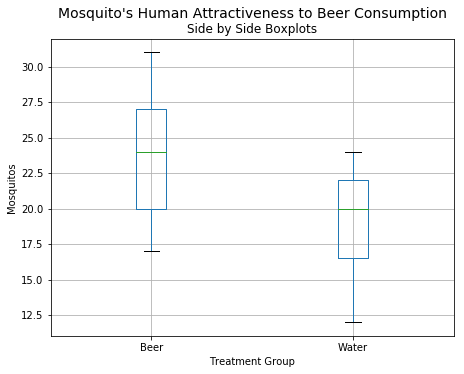

In [3]:
# Define Boxplot 
axes = exp_df.boxplot(by=['Treatment'], figsize=(7, 5.5))
plt.subtitle('Mosquito\'s Human Attractiveness to Beer Consumption', color='k', fontsize=14)
plt.title('Side by Side Boxplots')
plt.ylabel('Mosquitos')
plt.xlabel('Treatment Group');#Magic trick to hide matplotlib return value display

**What does the graph reveal about the data for both groups? Is there an association between beer consumption and attractiveness to mosquitos?**
* In the side by side boxplots drawn above treatment groups are represented on X axis, and Y axis depicts the values of responses or number of mosquitos attracted in each group.
* As there are no outliers below the lower whiskers, they indicate lowest value or min limits for each group.
* Same is true for upper whiskers, as there are no outliers above, they depict the max limits.
* Lower edges of the boxes represent 25% quartile values, and upper edges represent 75% quartile of the values.
* Heights of boxes represent Inter Quartile Range (IQR) for each group. 
* Green horizontal lines inside the boxes depict the median value of each group.
* There is very noticeable difference, somewhere between 3-5, in the median values of both groups. Beer group has relatively larger IQR which indicates larger range of the values. Upper and lower limits for beer group are higher than the water group. 
* From the location of whiskers, and absence of outliers, it appears that max and min limits are in fact less than 1.5\*IQR range for both the groups. This tells us that median values are very good indicators of these data sets.
* Looking at big difference in median values, and over all shift of the boxplot for beer group towards more mosquitos there is a strong indication that beer consumption has positive association with mosquito attractiveness to humans. 

# Section D: Summary Statistics
** Compute basic statistic measures for each group: the mean, median, standard deviation**

In [4]:
# Organize into two groups: Beer and Water
# Compute stats for each group
beer_df = exp_df.loc[exp_df['Treatment']=='Beer']
water_df = exp_df.loc[exp_df['Treatment']=='Water']
# Using dataframe describe() for getting all basic summary statistics, easy way!!
print 'Beer Group: ', '\n', beer_df.describe()
print'\nWater Group:','\n',water_df.describe()
#Difference in meanness!!
beer_water_mean_dif = np.round(float(beer_df.mean() - water_df.mean()),6)

Beer Group:  
        Response
count  25.000000
mean   23.600000
std     4.133199
min    17.000000
25%    20.000000
50%    24.000000
75%    27.000000
max    31.000000

Water Group: 
        Response
count  18.000000
mean   19.222222
std     3.671120
min    12.000000
25%    16.500000
50%    20.000000
75%    22.000000
max    24.000000


In [5]:
print'\nMean Difference between beer and water groups: ',beer_water_mean_dif;
print '% Increase over water group mean value: ', np.round(float(beer_water_mean_dif/water_df.mean())*100,6);


Mean Difference between beer and water groups:  4.377778
% Increase over water group mean value:  22.774568


**Explain the numbers:**

* Count tells the size of the experiment sample, and min and max provided the minimum and maximum values in each group.
* Statistics labeled 25%, 50%,75% give number of mosquitos for 25%, 50%, 75% quartile values respectively. All these numbers show a marked shift towards higher numbers for beer group. 
* Mean and std (standard deviation) are two statistics of utmost importance for this experiment. In the absence of outliers (refer to boxplots above) mean values are very good indicator of these data sets properties. Mean difference of 4.3, beer group mean being 22.8% more than water group mean value, strongly support the hypothesis that beer consumption increase the human attractiveness to mosquitos. However this hypothesis need to be tested using statistical methods. 
* Standard deviation (std) is a good measure of dispersion or variations in the values. Beer group has slightly more dispersion (std=4.13) than water group (std=3.67).
* Next section illustrates the use of Random Permutation Test to test the alternate hypothesis (to check if mean difference is because of chance variation).

# Section E: Bonus - data simulation as in the video 
**Test the alternate hypothesis (mean variance is caused by random variation) using resampling simulations:**

*Randomization Test or Permutation Test or Random Permutation Test*

In [6]:
# Random Permutation Test as presented in the video
# Generate Random Permutation Sample
simulations = 50000
# Get experiment observations to an array
case_ar = exp_df.iloc[:,0:1].values
# Get the count of responses for the beer group 
split_limit = beer_df.count()['Response']
# Simulation: repeat the steps below 
# 1. Random shuffle the data
# 2. Split between beer and water groups
# 3. Compute the difference in mean, and store the values in an array 
mean_dif_ar = np.ndarray(simulations)
for j in range(simulations):
    np.random.shuffle(case_ar)
    mean_dif_ar[j] = (case_ar[:split_limit].mean() - case_ar[split_limit:].mean())
print 'Simulated mean differences count: ', mean_dif_ar.size

Simulated mean differences count:  50000


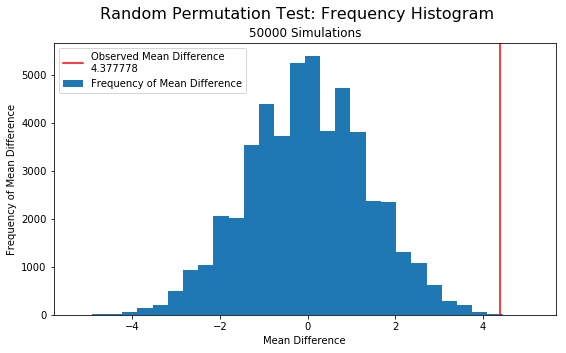

In [7]:
# Plot Results of Random Permutation Test
plt.figure(figsize=(9,5))
plt.hist(mean_dif_ar,bins=30, label='Frequency of Mean Difference')
# Mark the position of experiment mean difference on the plot
ax = plt.gca()
ax.axvline(beer_water_mean_dif, color='r', linestyle='-',
           label='Observed Mean Difference\n' + str(beer_water_mean_dif))
# Define labels and legend display
plt.xlabel('Mean Difference')
plt.ylabel('Frequency of Mean Difference')
plt.legend(loc='best')
plt.subtitle('Random Permutation Test: Frequency Histogram',color='k', fontsize = 16)
plt.title(str(simulations) + ' Simulations');

**Alternate Plot: Probability Distribution of Mean Difference**

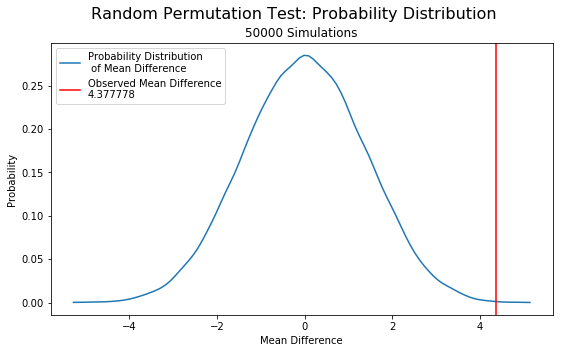

In [8]:
# Alternate Plot: Probability Distribution of Mean Difference
# This creates the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde( mean_dif_ar )
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(mean_dif_ar), max(mean_dif_ar), 100 )
# plot the results
plt.figure(figsize=(9,5))
plt.plot( dist_space, kde(dist_space), label='Probability Distribution\n of Mean Difference' )
# Mark the position of experiment mean difference on the plot
ax = plt.gca()
ax.axvline(beer_water_mean_dif, color='r', linestyle='-'
           , label='Observed Mean Difference\n' + str(beer_water_mean_dif))
# Define legend and label display
plt.xlabel('Mean Difference')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.subtitle('Random Permutation Test: Probability Distribution',color='k', fontsize=16)
plt.title(str(simulations) + ' Simulations');

**The probability of random chance of mean difference 4.37 is near to zero.**

**Conclusion:**
* Mean difference in the treatment groups of study is not because of random chance.
* Mosquitos do like beer.
* Alternate hypothesis (mean variance is by random chance) is rejected.
